# Anticipating Market Reactions to Fed Policy

Author: Ben Rounds

*Last edit: 3/12/16*

In [1]:
import os
os.getcwd()

'C:\\Users\\Ben\\Documents\\DAT-NYC-30\\project'

In [2]:
import spacy
from spacy.en import English
import pandas as pd
import numpy as np
from spacy.en import English
from gensim.models.word2vec import Word2Vec
from bs4 import BeautifulSoup
import urllib2
import re
import datetime
import gensim
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();
%matplotlib inline

Create list of url strings from which to scrape Fed policy statements. FOMC statement statements are pulled from the official website: http://www.federalreserve.gov/newsevents/press/monetary/2016monetary.htm.

For final iteration, consider saving URLs  as a separate file to make it prettier.

In [4]:
releases = ['http://www.federalreserve.gov/newsevents/press/monetary/20160127a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20151216a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20151028a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20150917a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20150729a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20150617a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20150429a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20150318a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20150128a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20141217a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20141029a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20140917a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20140730a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20140618a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20140430a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20140319a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20140129a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20131218a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20131030a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20130918a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20130731a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20130619a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20130501a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20130320a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20130130a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20121212a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20121024a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20120913a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20120801a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20120620a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20120425a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20120313a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20120125a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20111213a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20111102a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20110921a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20110809a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20110622a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20110427a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20110315a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20110126a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20101214a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20101103a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20100921a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20100810a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20100623a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20100428a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20100316a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20100127a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20091216a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20091104a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20090923a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20090812a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20090624a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20090429a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20090318a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20090128a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20081216b.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20081029a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20081014a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20081008a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20080916a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20080805a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20080625a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20080430a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20080318a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20080311a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20080130a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20080122b.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20071211a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20071031a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20070918a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20070807a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20070618a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20070509a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20070321a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20070131a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20061212a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20061025a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20060920a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20060808a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20060629a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20060510a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20060328a.htm',
           'http://www.federalreserve.gov/newsevents/press/monetary/20060131a.htm']

Load financial dictionary with terms and sentiments aggregated from 10-K statements.

Dictionary comes from http://www3.nd.edu/~mcdonald/Word_Lists.html

In [5]:
# Financial dictionary with sentiment classifications 
fin_dict =  pd.read_excel('LoughranMcDonald_MasterDictionary_2014.xlsx', 
                         header=0)
fin_dict = fin_dict.drop(fin_dict.columns[[1,2,3,4,5,6,17,18]],
                              axis=1)

In [6]:
fin_dict.head()

,Word,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Modal,Irr_Verb,Harvard_IV
0,AARDVARK,0,0,0,0,0,0,0,0,0,0
1,AARDVARKS,0,0,0,0,0,0,0,0,0,0
2,ABACI,0,0,0,0,0,0,0,0,0,0
3,ABACK,0,0,0,0,0,0,0,0,0,0
4,ABACUS,0,0,0,0,0,0,0,0,0,0


Dictionary includes the year in which a word was classified as a particular sentiment. For all words with nonzero sentiment scores, change the year to a 1 as to have binary classifiers.

In [7]:
# Change all nonzero elements to 1s
sentiments = ['Negative','Positive','Uncertainty','Litigious',
              'Constraining','Superfluous','Interesting']

for col in sentiments:
    fin_dict.ix[fin_dict[col] > 0, col] = 1

Change all words to lower case, as to provide for easier matching with words scraped from the web.

In [8]:
fin_dict['Word'] = fin_dict['Word'].str.lower()
fin_dict.head()

,Word,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Modal,Irr_Verb,Harvard_IV
0,aardvark,0,0,0,0,0,0,0,0,0,0
1,aardvarks,0,0,0,0,0,0,0,0,0,0
2,abaci,0,0,0,0,0,0,0,0,0,0
3,aback,0,0,0,0,0,0,0,0,0,0
4,abacus,0,0,0,0,0,0,0,0,0,0


Compress the dictionary to only include words for which there exists at least one nonzero sentiment rating.

In [9]:
# Find and remove rows with no sentiment score in dictionary
drop_rows = []
for i in range(fin_dict.shape[0]):
    if sum(fin_dict.iloc[i,1:7])==0:
        drop_rows.append(i)

In [10]:
# Create new dictionary with only sentiment-loaded words
fin_dict_abrev = fin_dict.drop(fin_dict.index[drop_rows])
fin_dict_abrev.head()

,Word,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Modal,Irr_Verb,Harvard_IV
9,abandon,1,0,0,0,0,0,0,0,0,1
10,abandoned,1,0,0,0,0,0,0,0,0,2
11,abandoning,1,0,0,0,0,0,0,0,0,2
12,abandonment,1,0,0,0,0,0,0,0,0,1
13,abandonments,1,0,0,0,0,0,0,0,0,2


Aggregate the words for which there exists some nonzero sentiment score in a set for faster searching and matching later.

In [11]:
# Put meaningful words in a set, aptly titled 'meaningful_words'
meaningful_words = set(fin_dict_abrev.Word)

In [12]:
# Show the reduction in the size of the full vs. abbreviated dictionaries
print "Words in original dictionary = {}.".format(fin_dict.shape[0])
print "Words in abreviated dictionary = {}.".format(fin_dict_abrev.shape[0])

Words in original dictionary = 85131.
Words in abreviated dictionary = 3916.


Begin scraping the web data using *Beautiful Soup*

In [13]:
# Read url with beautiful soup
page = urllib2.urlopen(releases[0])
soup = BeautifulSoup(page, 'lxml')

# Pull date object from each url
url_date = soup.find("p", {"id": "prContentDate"})
date_regex = re.compile("(?<=Date: )(?P<value>.*?)(?=<!)")
match = date_regex.search(str(url_date))
date = match.group()

# Convert date from 'Month DD, YYYY' to 'YYYY-MM-DD'
d = datetime.datetime.strptime(date, '%B %d, %Y').strftime('%Y-%m-%d')
d

'2016-01-27'

Format and parse the text data.

Recognize the tokenization of body.lower() as to match words to the lower-case dictionary.

In [14]:
# Extract text body from the webpage
body = soup.find("div", {"id": "leftText"}).getText()
nlp = English()
doc = nlp(body.lower())

Tokenize the body.

In [15]:
# Isolate the individual tokens
tokens = [t.orth_ for t in doc]
tokens

[u'\n\r\n\r\n\r\n\r\n\r\n',
 u'release',
 u'date',
 u':',
 u'january',
 u'27',
 u',',
 u'2016',
 u'\n\n\r\n\r\n    ',
 u'for',
 u'release',
 u'at',
 u'2:00',
 u'p.m.',
 u'est',
 u'\r\n\n',
 u'information',
 u'received',
 u'since',
 u'the',
 u'federal',
 u'open',
 u'market',
 u'committee',
 u'met',
 u'in',
 u'december',
 u'suggests',
 u'that',
 u'labor',
 u'market',
 u'conditions',
 u'improved',
 u'further',
 u'even',
 u'as',
 u'economic',
 u'growth',
 u'slowed',
 u'late',
 u'last',
 u'year',
 u'.',
 u'household',
 u'spending',
 u'and',
 u'business',
 u'fixed',
 u'investment',
 u'have',
 u'been',
 u'increasing',
 u'at',
 u'moderate',
 u'rates',
 u'in',
 u'recent',
 u'months',
 u',',
 u'and',
 u'the',
 u'housing',
 u'sector',
 u'has',
 u'improved',
 u'further',
 u';',
 u'however',
 u',',
 u'net',
 u'exports',
 u'have',
 u'been',
 u'soft',
 u'and',
 u'inventory',
 u'investment',
 u'slowed',
 u'.',
 u'a',
 u'range',
 u'of',
 u'recent',
 u'labor',
 u'market',
 u'indicators',
 u',',
 u'inclu

View only tokens for which there exists a sentiment score in the dictionary.

In [16]:
# Assess the tokens that fall into words with sentiment scores in set 'meaningful_words'
tokens_imp = [t for t in tokens if t in meaningful_words]
tokens_imp

[u'suggests',
 u'improved',
 u'slowed',
 u'late',
 u'improved',
 u'slowed',
 u'strong',
 u'gains',
 u'decline',
 u'underutilization',
 u'declines',
 u'declined',
 u'statutory',
 u'mandate',
 u'stability',
 u'strengthen',
 u'declines',
 u'declines',
 u'strengthens',
 u'risks',
 u'improvement',
 u'shortfall',
 u'progress',
 u'depend',
 u'anticipates']

View the frequency of the unique tokens.

In [17]:
# Calculate frequency of meaningful tokens
token_freq = []
for token in range(len(tokens_imp)):
    token_freq.append(tokens_imp.count(tokens_imp[token]))

frequency = pd.DataFrame(zip(tokens_imp, token_freq), columns = ['tokens', 'occurences'])
frequency.drop_duplicates('tokens')

,tokens,occurences
0,suggests,1
1,improved,2
2,slowed,2
3,late,1
6,strong,1
7,gains,1
8,decline,1
9,underutilization,1
10,declines,3
11,declined,1


Find sentiment score by iteratively adding tokens and their frequencies with their respective scores in the dictionary.

In [20]:
token = frequency.iloc[0,0]
token

u'suggests'

In [21]:
# Search for token in dictionary
fin_dict_abrev[fin_dict_abrev.Word == token].ix[:,1:8]

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
73279,0,0,1,0,0,0,0


Create empty dataframe in which to record the aggregated sentiment data for all "meaningful" tokens in the document.

In [22]:
# Create empty dataframe in which to record scores
categories = ['Statement','Negative','Positive','Uncertainty','Litigious',
           'Constraining','Superfluous','Interesting']
fomc_data = pd.DataFrame([[0]*len(categories)], columns=categories)

In [23]:
# Dataframe to be used as a counter
pd.DataFrame(fomc_data.ix[0,1:8]).T

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
0,0,0,0,0,0,0,0


In [27]:
# Add the dictionary reference to a blank fomc_data 
fomc_data.Statement = d
fomc_data.ix[0,1:8] = np.add(pd.DataFrame(fomc_data.ix[0,1:8]).T, 
                            # multiply the sentiment profile of each token by its frequency 
                            (pd.DataFrame(fin_dict_abrev[fin_dict_abrev.Word == token].ix[:,1:8]) *
                             frequency[frequency.tokens==token].iloc[0,1])).iloc[0,:]

In [28]:
fomc_data

,Statement,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
0,2016-01-27,0,0,1,0,0,0,0


In [328]:
crap = fomc_data.copy()
crap.Statement = '2006-01-31'
crap.Positive = 1
crap.Uncertainty = 2
crap.Negative = 0
crap

,Statement,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
0,2006-01-31,0,1,2,0,0,0,0


In [29]:
# Test a few tokens:

for i in range(10):
    token = frequency.iloc[i,0]
    fomc_data.ix[0,1:8] = np.add(pd.DataFrame(fomc_data.ix[0,1:8]).T,
                                (fin_dict_abrev[fin_dict_abrev.Word == token].ix[:,1:8] *
                                 frequency[frequency.tokens==token].iloc[0,1])).iloc[0,:]
    
fomc_data   


,Statement,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
0,2016-01-27,7,6,2,0,0,0,0


Write helper function to conduct all of the above as well as aggregating sentiment data measured by the occurrence of sentiment-laden words from each statement.

In [30]:
# Create function to scrape and clean data from url
def scrapeNrate(url):
    # scrape webpage with beautiful soup
    page = urllib2.urlopen(url)
    soup = BeautifulSoup(page, 'lxml')
    
    # pull Date
    url_date = soup.find("p", {"id": "prContentDate"})
    value_regex = re.compile("(?<=Date: )(?P<value>.*?)(?=<!)")
    match = value_regex.search(str(url_date))
    date = match.group()
    d = datetime.datetime.strptime(date, '%B %d, %Y').strftime('%Y-%m-%d')
    
    # Extract text body from the webpage
    body = soup.find("div", {"id": "leftText"}).getText()
    nlp = English()
    doc = nlp(body.lower())
    
    # Isolate the individual tokens
    tokens = [t.orth_ for t in doc]
    tokens_imp = [t for t in tokens if t in meaningful_words]
    unique_tokens = list(set(tokens_imp))
    
    # Calculate frequency of meaningful tokens
    token_freq = []
    sentiment_count = pd.DataFrame([[0]*len(sentiments)], columns=sentiments)
    for token in range(len(unique_tokens)):
        # Record frequency with which tokens appear in the text
        token_freq.append(tokens_imp.count(unique_tokens[token]))
        # Record the contribution to sentiment of the word - i.e. dictionary sentiment * occurrence
        sentiment_count = np.add(sentiment_count,
                                    (fin_dict_abrev[fin_dict_abrev.Word == unique_tokens[token]].ix[:,1:8] *
                                     # multiply the sentiment profile of each token by its frequency 
                                     tokens_imp.count(unique_tokens[token])))
        
    # Compile a dataframe of each meaningful token along with its number of occurrences
    frequency = pd.DataFrame(zip(unique_tokens, token_freq), columns = ['tokens', 'occurences'])

    # Return a list with three elements: 
        # 1) date
        # 2) dataframe of tokens with their frequency
        # 3) dataframe of aggregated sentiment data from the website
    return(d, frequency, sentiment_count)

In [31]:
%timeit scrapeNrate(releases[0])

1 loops, best of 3: 16.7 s per loop


In [32]:
data = scrapeNrate(releases[0])

View the 3 components of the scrapeNrate object for the first link.

In [33]:
data[0]

'2016-01-27'

In [34]:
data[1].T

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
tokens,decline,improved,gains,strengthen,declines,statutory,depend,improvement,late,suggests,...,shortfall,declined,stability,mandate,anticipates,progress,strong,strengthens,underutilization,risks
occurences,1,2,1,1,3,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [35]:
data[2]

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
0,10,9,4,1,2,0,0


___________________

** Pull data iteratively from releases[] list**

Will take a long time.

In [36]:
data = []

for i in range(len(releases)):
    # Apply helper function on each link in 'releases'
    data.append(scrapeNrate(releases[i]))
    # Print a progress report to keep track of how many links are completed
    print "Completed with url {} of {}.".format(i, len(releases))

Error is okay so long as function call managed to pull sufficient data.

In [720]:
print "Websites successfully scraped = {}.".format(len(data))
print "Total Websites in 'releases' list = {}.".format(len(releases))

Websites successfully scraped = 59.
Total Websites in 'releases' list = 85.


In [722]:
data[-1][0]

'2008-10-29'

Try to gather the rest of the data.

In [724]:
forgotten_data = []
for i in range(len(data)+1, len(releases)):
    forgotten_data.append(scrapeNrate(releases[i]))
    print "Completed with url {} of {}.".format(i, len(releases))

Completed with url 60 of 85.
Completed with url 61 of 85.
Completed with url 62 of 85.
Completed with url 63 of 85.
Completed with url 64 of 85.
Completed with url 65 of 85.
Completed with url 66 of 85.
Completed with url 67 of 85.
Completed with url 68 of 85.
Completed with url 69 of 85.
Completed with url 70 of 85.
Completed with url 71 of 85.
Completed with url 72 of 85.
Completed with url 73 of 85.
Completed with url 74 of 85.
Completed with url 75 of 85.
Completed with url 76 of 85.
Completed with url 77 of 85.
Completed with url 78 of 85.
Completed with url 79 of 85.
Completed with url 80 of 85.
Completed with url 81 of 85.
Completed with url 82 of 85.
Completed with url 83 of 85.
Completed with url 84 of 85.


In [725]:
print len(data)
print len(forgotten_data)

59
25


In [726]:
data = data + forgotten_data

In [727]:
len(data)

84

Save data from helper function run to avoid any mistakes saving it over.

Instructions for saving from http://stackoverflow.com/questions/17225287/python-2-7-write-and-read-a-list-from-file

In [39]:
# Save the list object in case of mistakes so it can be loaded from file
import pickle

with open('function_list', 'wb') as f:
    pickle.dump(data, f)

In [40]:
### To load list in case of mistake
with open('function_list', 'rb') as f:
    data2 = pickle.load(f)
    
data = data2

Combine data from initial iteration as well as the secondary iteration.

In [41]:
data[0]

('2016-01-27',               tokens  occurences
 0            decline           1
 1           improved           2
 2              gains           1
 3         strengthen           1
 4           declines           3
 5          statutory           1
 6             depend           1
 7        improvement           1
 8               late           1
 9           suggests           1
 10            slowed           2
 11         shortfall           1
 12          declined           1
 13         stability           1
 14           mandate           1
 15       anticipates           1
 16          progress           1
 17            strong           1
 18       strengthens           1
 19  underutilization           1
 20             risks           1,    Negative  Positive  Uncertainty  Litigious  Constraining  Superfluous  \
 0        10         9            4          1             2            0   
 
    Interesting  
 0            0  )

In [42]:
data[-1]

('2006-01-31',        tokens  occurences
 0         may           1
 1    possible           1
 2     roughly           1
 3   stability           1
 4  attainment           1
 5       risks           1
 6     appears           1,    Negative  Positive  Uncertainty  Litigious  Constraining  Superfluous  \
 0         0         2            5          0             0            0   
 
    Interesting  
 0            0  )

_______

Pull dates and sentiment data into a datafame for analysis.

In [43]:
dates = pd.Series(map(lambda x: x[0], data))

In [44]:
sentiment_scores = map(lambda x: x[2], data)

In [45]:
dates[0]

'2016-01-27'

In [46]:
sentiment_scores[0]

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
0,10,9,4,1,2,0,0


In [47]:
# Create dataframe with the sentiment data of the various FOMC statements
sentiment_ts = pd.DataFrame(columns = ['date'] + sentiments)

for i in range(len(dates)):
    row = sentiment_scores[i].copy()
    row.insert(0, 'date', dates[i])
    sentiment_ts = pd.concat([sentiment_ts, row])    

In [48]:
sentiment_ts.head()

,date,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
0,2016-01-27,10,9,4,1,2,0,0
0,2015-12-16,7,10,4,1,2,0,0
0,2015-10-28,7,9,7,1,3,1,0
0,2015-09-17,8,10,9,1,4,1,0
0,2015-07-29,6,10,7,1,3,0,0


In [49]:
sentiment_ts['Date'] = pd.to_datetime(sentiment_ts['date'])
sentiment_ts.set_index('Date', inplace = True)
sentiment_ts = sentiment_ts.drop('date', axis=1)
sentiment_ts.head()

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
Date,,,,,,,
2016-01-27,10,9,4,1,2,0,0
2015-12-16,7,10,4,1,2,0,0
2015-10-28,7,9,7,1,3,1,0
2015-09-17,8,10,9,1,4,1,0
2015-07-29,6,10,7,1,3,0,0


In [50]:
sentiment_ts = sentiment_ts.sort_index()
sentiment_ts.head()

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting
Date,,,,,,,
2006-01-31,0,2,5,0,0,0,0
2006-03-28,1,4,7,0,0,0,0
2006-05-10,1,3,6,0,1,0,0
2006-06-29,1,3,5,0,2,0,0
2006-08-08,2,1,4,0,2,1,0


**Load Excel data for currency returns and volatility.**

Returns and volatility have been modified in Excel rather than pandas. For transparency, this should be redone in the module.

Description of the variables:

- excel_returns = 2 week forward-looking returns of the various currency pairs with respect to the dollar
- excel_vol = 1 month forward daily return volatility (annualized) 

In [51]:
# Read the 1 day returns data from Excel
excel_1D_returns = pd.read_excel('FX_data.xlsx', sheetname = '1D_Returns',
                               header = 0, index_col = 0)
# Read the 1 week returns data from Excel
excel_1W_returns = pd.read_excel('FX_data.xlsx', sheetname = '1W_Returns',
                               header = 0, index_col = 0)
# Read the 1 Month returns data from Excel
excel_1M_returns = pd.read_excel('FX_data.xlsx', sheetname = '1M_Returns',
                               header = 0, index_col = 0)

In [52]:
# Read the 1-month volatility (annualized) data
excel_vol = pd.read_excel('FX_data.xlsx', sheetname = 'Combo_Vol',
                           header = 0, index_col = 0)
# Remove return from dataframe
excel_vol = excel_vol.drop('Return',axis=1)

Consider, time-permitting, loading data through pandas.io.data. For now, use Excel data.

Subset all returns to only include EUR, GBP, and JPY and take the average of both.

In [53]:
# Subset to the three major reserve currencies
daily_returns = excel_1D_returns.copy()[['USDJPY Curncy','USDEUR Curncy','USDGBP Curncy']]
weekly_returns = excel_1W_returns.copy()[['USDJPY Curncy','USDEUR Curncy','USDGBP Curncy']]
monthly_returns = excel_1M_returns.copy()[['USDJPY Curncy','USDEUR Curncy','USDGBP Curncy']]
vol = excel_vol.copy()

# For both metrics, reduce the three currencies by taking the average
returns_d = daily_returns.apply(lambda x: np.mean(x), axis=1)
returns_w = weekly_returns.apply(lambda x: np.mean(x), axis=1)
returns_m = monthly_returns.apply(lambda x: np.mean(x), axis=1)


Create datasets with various windows of returns as the predicted variable for analysis. Also add 1 month trailing volatility as an independent variable.

In [54]:
# Append the return variable onto sentiment data by inserting as last column of dataframe
test = pd.DataFrame(sentiment_ts.iloc[1]).T.copy()
test.insert(len(test.columns), 'return', returns_d[returns_d.index == sentiment_ts.index[1]])
test

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,return
2006-03-28,1,4,7,0,0,0,0,0.000684


In [55]:
d_sentiment = pd.DataFrame(columns = sentiments + ['Vol','Return'])
w_sentiment = pd.DataFrame(columns = sentiments + ['Vol','Return'])
m_sentiment = pd.DataFrame(columns = sentiments + ['Vol','Return'])

for i in range(sentiment_ts.shape[0]):
    # Create rows to append
    row_d = pd.DataFrame(sentiment_ts.iloc[i]).T.copy()
    row_w = pd.DataFrame(sentiment_ts.iloc[i]).T.copy()
    row_m = pd.DataFrame(sentiment_ts.iloc[i]).T.copy()
    
    # Inset vol for all rows
    row_d.insert(len(sentiment_ts.columns), 'Vol', vol[vol.index == sentiment_ts.index[i]])
    row_w.insert(len(sentiment_ts.columns), 'Vol', vol[vol.index == sentiment_ts.index[i]])
    row_m.insert(len(sentiment_ts.columns), 'Vol', vol[vol.index == sentiment_ts.index[i]])
    
    # Insert the forward-looking return for each statement
    row_d.insert(len(sentiment_ts.columns)+1, 'Return', returns_d[returns_d.index == sentiment_ts.index[i]])
    row_w.insert(len(sentiment_ts.columns)+1, 'Return', returns_w[returns_w.index == sentiment_ts.index[i]])
    row_m.insert(len(sentiment_ts.columns)+1, 'Return', returns_m[returns_m.index == sentiment_ts.index[i]])
    
    # Populate new dataframes appending return and vol respectively
    d_sentiment = pd.concat([d_sentiment, row_d])  
    w_sentiment = pd.concat([w_sentiment, row_w])
    m_sentiment = pd.concat([m_sentiment, row_m])

Now have three datasets over which to forecast return:

* d_sentiment = sentiment ratings for the fed statements using 1 day forward-looking returns
* w_sentiment = sentiment ratings for the fed statements using 1 week forward-looking returns
* m_sentiment = sentiment ratings for the fed statements using 1 month forward-looking returns

In [56]:
d_sentiment.head()

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Vol,Return
2006-01-31,0,2,5,0,0,0,0,0.000000,0.005725
2006-03-28,1,4,7,0,0,0,0,0.068267,0.000684
2006-05-10,1,3,6,0,1,0,0,0.056059,-0.004095
2006-06-29,1,3,5,0,2,0,0,0.080575,-0.009210
2006-08-08,2,1,4,0,2,1,0,0.079068,-0.000163


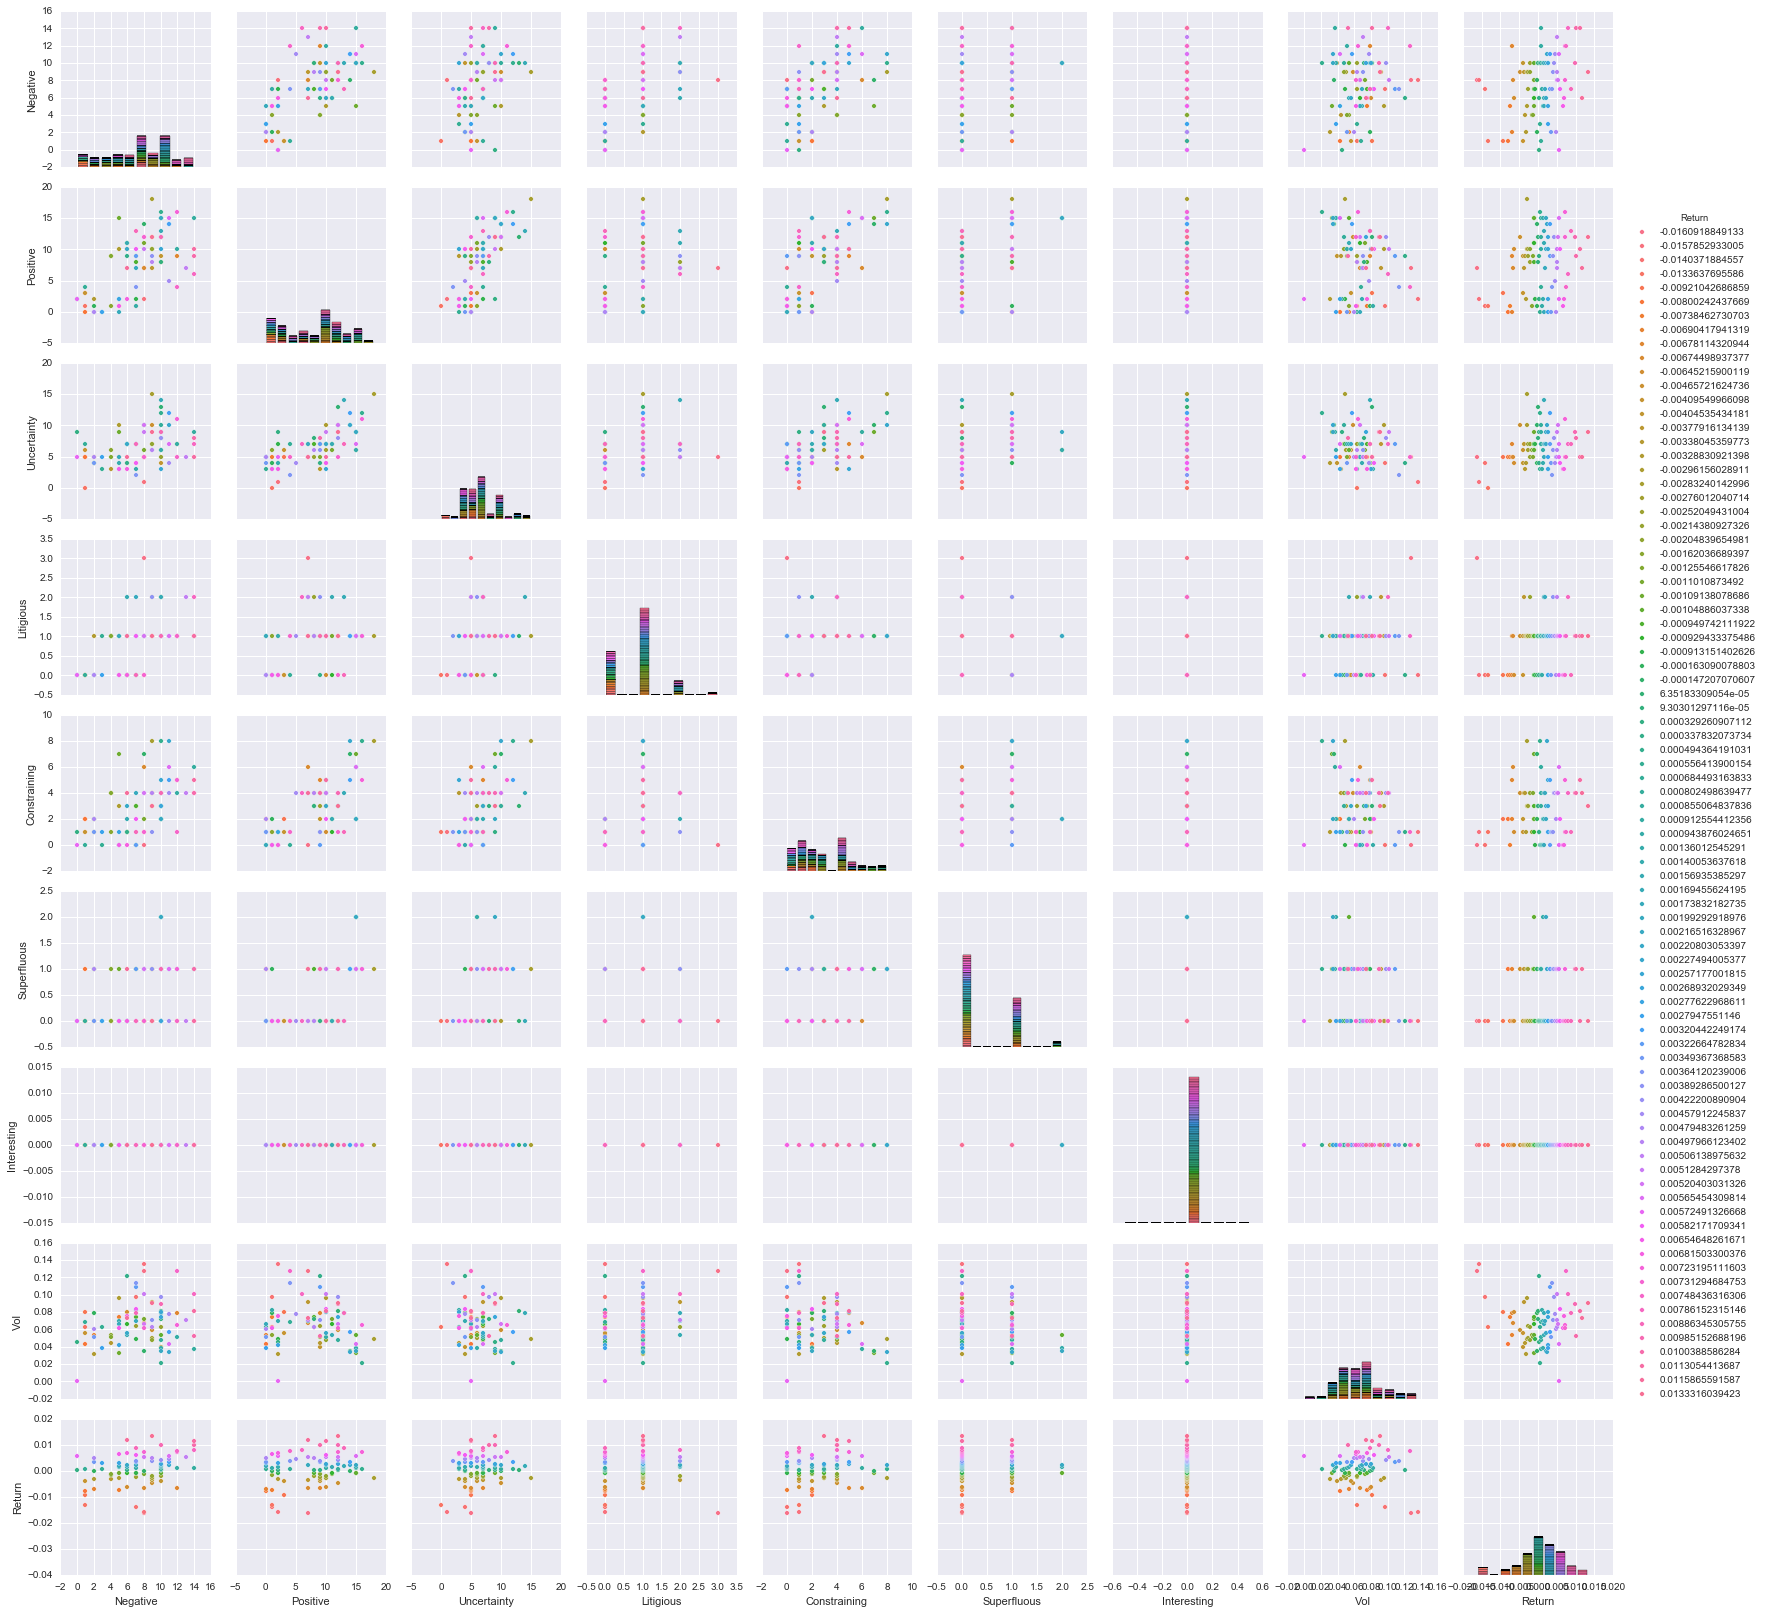

In [200]:
sns.pairplot(dropna=True, hue="Return", data=d_sentiment);

_______________

Observe the 10th and 90th percentile of 1-day returns

In [57]:
pd.DataFrame(d_sentiment.quantile(0.1)).T

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Vol,Return
0,2,1,3,0,0,0,0,0.038432,-0.00677


In [58]:
pd.DataFrame(d_sentiment.quantile(0.9)).T

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Vol,Return
0,11.7,14.7,10,1.7,5,1,0,0.097362,0.007289


Observe the 10th and 90th percentile of 1-week returns

In [59]:
pd.DataFrame(w_sentiment.quantile(0.1)).T

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Vol,Return
0,2,1,3,0,0,0,0,0.038432,-0.011457


In [60]:
pd.DataFrame(w_sentiment.quantile(0.9)).T

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Vol,Return
0,11.7,14.7,10,1.7,5,1,0,0.097362,0.013631


Observe the 10th and 90th percentile of 1-month returns

In [61]:
pd.DataFrame(m_sentiment.quantile(0.1)).T

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Vol,Return
0,2,1,3,0,0,0,0,0.038432,-0.014584


In [62]:
pd.DataFrame(m_sentiment.quantile(0.9)).T

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Vol,Return
0,11.7,14.7,10,1.7,5,1,0,0.097362,0.026102


**Transform return and volatility variables**

For Returns and volatility modeling, raw continuous numbers are of limited use. Want to transform both into categorical variables to be more meaningful in the context of magnitude and change.

For returns, transform the return variable to be 1 if period return is greater than the 90th percentile, 0 if between the 10th and 90th percentile, and -1 if return is less than the 10th percentile. 

for volatility, consider restructuring the variable to represent a departure from the previous regime demeaning to observe excess volatility.

In [63]:
m_sentiment.Return.quantile(0.9)

0.026101944677703416

In [ ]:
# Make copies of the above variables
d_sentiment_cat = d_sentiment.copy()
w_sentiment_cat = w_sentiment.copy()
m_sentiment_cat = m_sentiment.copy()

In [337]:
# Use map function to conditionally change 'Return' variable
d_sentiment_cat['Return'] = map(lambda x: 1 if x > d_sentiment.Return.quantile(0.9)
                         else -1 if x < d_sentiment.Return.quantile(0.1)
                         else 0, d_sentiment.Return)
# Weekly
w_sentiment_cat['Return'] = map(lambda x: 1 if x > w_sentiment.Return.quantile(0.9)
                         else -1 if x < w_sentiment.Return.quantile(0.1)
                         else 0, w_sentiment.Return)
# Monthly
m_sentiment_cat['Return'] = map(lambda x: 1 if x > m_sentiment.Return.quantile(0.9)
                         else -1 if x < m_sentiment.Return.quantile(0.1)
                         else 0, m_sentiment.Return)

In [338]:
m_sentiment.head()

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Vol,Return
2006-01-31,0,2,5,0,0,0,0,0.000000,0.009030
2006-03-28,1,4,7,0,0,0,0,0.068267,-0.029063
2006-05-10,1,3,6,0,1,0,0,0.056059,0.018640
2006-06-29,1,3,5,0,2,0,0,0.080575,-0.010351
2006-08-08,2,1,4,0,2,1,0,0.079068,0.008734


In [339]:
m_sentiment_cat.head()

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Vol,Return
2006-01-31,0,2,5,0,0,0,0,0.000000,0
2006-03-28,1,4,7,0,0,0,0,0.068267,-1
2006-05-10,1,3,6,0,1,0,0,0.056059,0
2006-06-29,1,3,5,0,2,0,0,0.080575,0
2006-08-08,2,1,4,0,2,1,0,0.079068,0


Look at the average predictive variables on the monthly scale under each return category.

In [340]:
plot_data = pd.DataFrame(zip(w_sentiment_cat[w_sentiment_cat.Return==-1].apply(lambda x: np.mean(x), axis=0),
    w_sentiment_cat[w_sentiment_cat.Return==0].apply(lambda x: np.mean(x), axis=0),
    w_sentiment_cat[w_sentiment_cat.Return==1].apply(lambda x: np.mean(x), axis=0)), 
    columns = ('Negative','Neutral','Positive'), index = sentiments + ['Vol','Return'])

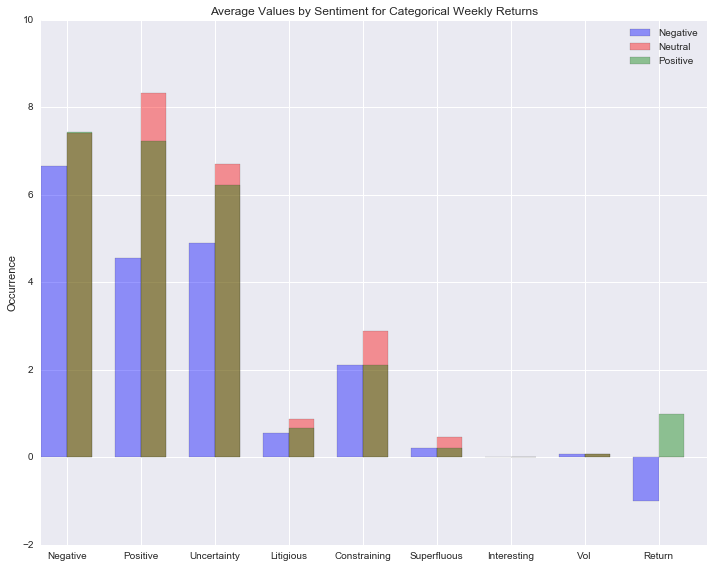

In [343]:
n_groups = 9

neg_vals = plot_data.Negative
neutral_vals = plot_data.Neutral
pos_vals = plot_data.Positive

fig, ax = plt.subplots(figsize=(10,8))

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, neg_vals, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Negative')

rects2 = plt.bar(index + bar_width, neutral_vals, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Neutral')

rects3 = plt.bar(index + bar_width, pos_vals, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Positive')

plt.ylabel('Occurrence')
plt.title('Average Values by Sentiment for Categorical Weekly Returns')
plt.xticks(index + bar_width, sentiments + ['Vol','Return'])
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\Ben\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


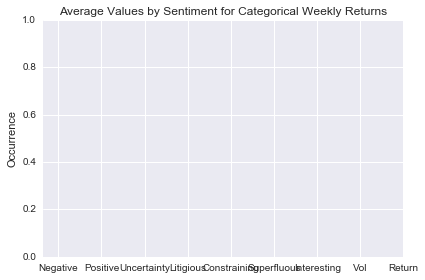

In [336]:
plt.ylabel('Occurrence')
plt.title('Average Values by Sentiment for Categorical Weekly Returns')
plt.xticks(index + bar_width, sentiments + ['Vol','Return'])
plt.legend()

plt.tight_layout()
plt.show()

In [217]:
plot_data = pd.DataFrame(zip(m_sentiment_cat[m_sentiment_cat.Return==-1].apply(lambda x: np.mean(x), axis=0),
    m_sentiment_cat[m_sentiment_cat.Return==0].apply(lambda x: np.mean(x), axis=0),
    m_sentiment_cat[m_sentiment_cat.Return==1].apply(lambda x: np.mean(x), axis=0)), 
    columns = ('Negative','Neutral','Positive'), index = sentiments + ['Vol','Return'])

plot_data

,Negative,Neutral,Positive
Negative,5.888889,7.348485,8.777778
Positive,5.222222,8.151515,7.888889
Uncertainty,5.444444,6.560606,6.666667
Litigious,0.666667,0.818182,1.000000
Constraining,2.000000,2.893939,2.111111
Superfluous,0.333333,0.439394,0.222222
Interesting,0.000000,0.000000,0.000000
Vol,0.063701,0.065074,0.082540
Return,-1.000000,0.000000,1.000000


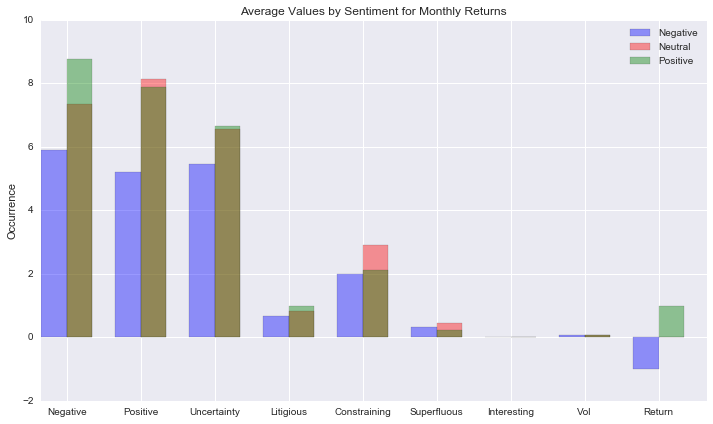

In [229]:
n_groups = 9

neg_vals = plot_data.Negative
neutral_vals = plot_data.Neutral
pos_vals = plot_data.Positive

fig, ax = plt.subplots(figsize=(10,6))

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, neg_vals, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Negative')

rects2 = plt.bar(index + bar_width, neutral_vals, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Neutral')

rects3 = plt.bar(index + bar_width, pos_vals, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Positive')

plt.ylabel('Occurrence')
plt.title('Average Values by Sentiment for Monthly Returns')
plt.xticks(index + bar_width, sentiments + ['Vol','Return'])
plt.legend()

plt.tight_layout()
plt.show()

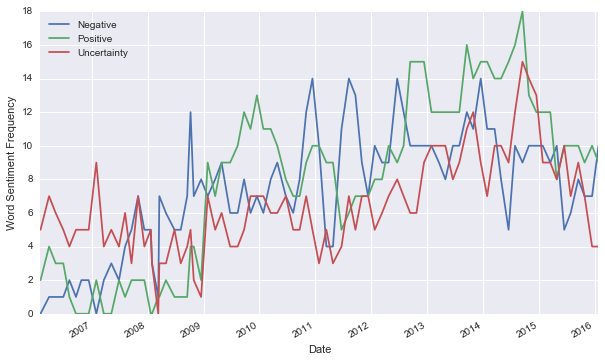

In [330]:
sentiment_ts.ix[:,('Negative','Positive','Uncertainty')].plot(figsize=(10,6))
plt.ylabel('Word Sentiment Frequency')
#plt.title('Occurrence of Sentiment-Laden Vocabulary in Fed Statements')
plt.show()


There appears to be some trending behavior, so try to smooth the data by using a rolling average of word occurrence. Below I show a 4 period window, as the Federal Open Market Committee convenes 8 times per year, making this a roughly 6-month indicator.

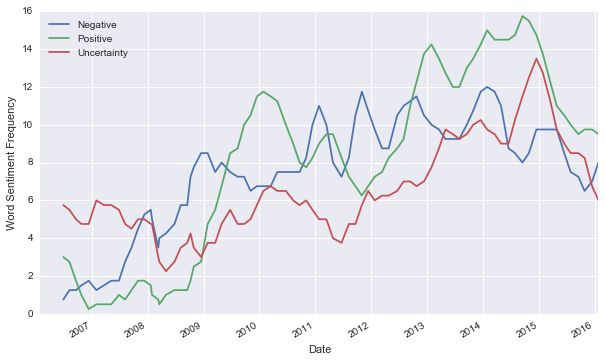

In [332]:
pd.rolling_mean(sentiment_ts.ix[:,('Negative','Positive','Uncertainty')],window=4, min_periods=4).plot(figsize=(10,6))
plt.ylabel('Word Sentiment Frequency')
#plt.title('Occurrence of Sentiment-Laden Vocabulary in Fed Statements')
plt.show()


In [70]:
import pandas.io.data as web
all_data = {}
currencies = ['JPY=X','EUR=X', 'GBP=X']

for ticker in currencies:
    all_data[ticker] = web.get_data_yahoo(ticker, '6/1/2006', '3/1/2016')
    
rates = pd.DataFrame({tic: data['Adj Close'] for tic, data in all_data.items()})

C:\Users\Ben\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [71]:
# Use negative look-back to make the returns forward-looking
daily_returns = rates.pct_change(-1)
weekly_returns = rates.pct_change(-5)
biweekly_returns = rates.pct_change(-10)
monthly_returns = rates.pct_change(-21)

In [72]:
daily_returns = pd.DataFrame(daily_returns.dropna(axis=0).apply(lambda x: np.mean(x), axis=1))
weekly_returns = pd.DataFrame(weekly_returns.dropna(axis=0).apply(lambda x: np.mean(x), axis=1))
biweekly_returns = pd.DataFrame(biweekly_returns.dropna(axis=0).apply(lambda x: np.mean(x), axis=1))
monthly_returns = pd.DataFrame(monthly_returns.dropna(axis=0).apply(lambda x: np.mean(x), axis=1))

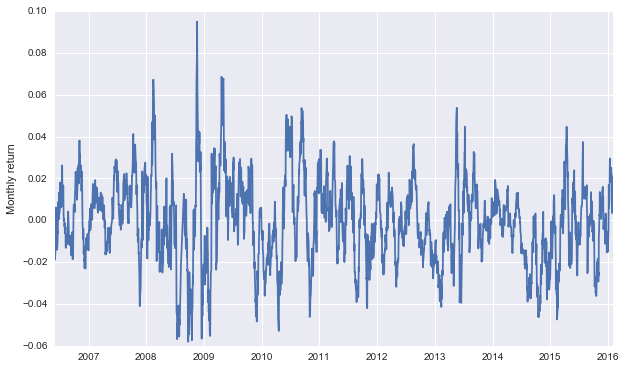

In [73]:
plt.figure(figsize=(10,6))
plt.plot(monthly_returns)
plt.ylabel('Monthly return')
#plt.title('Monthly Returns of EUR/GBP/JPY Returns to USD')

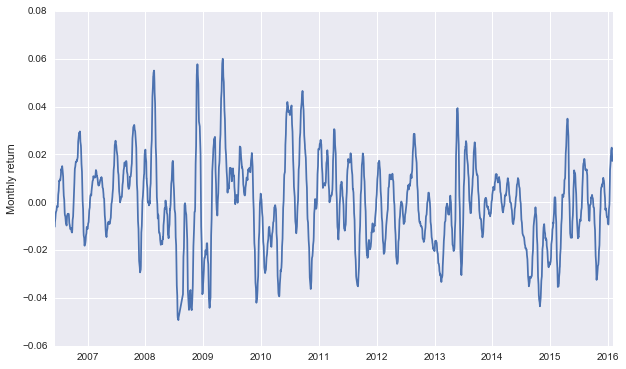

In [74]:
plt.figure(figsize=(10,6))
plt.plot(pd.rolling_mean(monthly_returns,window=10, min_periods=6))
plt.ylabel('Monthly return')
#plt.title('Monthly Returns of EUR/GBP/JPY Returns to USD')

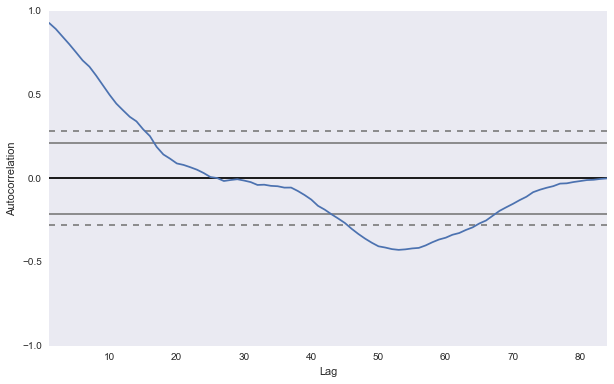

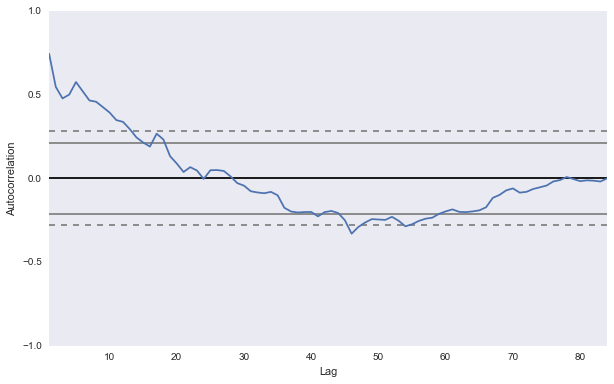

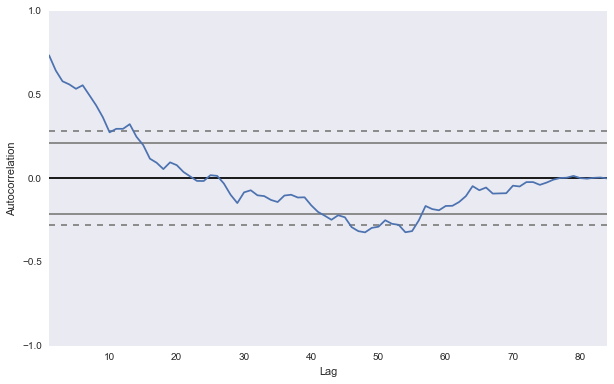

In [75]:
from pandas.tools.plotting import autocorrelation_plot

# Plot autocorrelation of positive sentiment word occurrence
plt.figure(figsize=(10,6))
autocorrelation_plot(sentiment_ts.Positive)
plt.show()

# Plot autocorrelation of negative sentiment word occurrence
plt.figure(figsize=(10,6))
autocorrelation_plot(sentiment_ts.Negative)
plt.show()

# Plot autocorrelation of uncertain sentiment word occurrence
plt.figure(figsize=(10,6))
autocorrelation_plot(sentiment_ts.Uncertainty)
plt.show()

While the frequency with which sentiment-laden words appear in FOMC policy statements does seem to have some trending behavior, this is difficult to see as number of words is not a smooth variable. Seek to smooth these numbers by taking a rolling average and plotting again.

___________________ 


# Modeling:

- Model both datasets with the Nearest Neighbors algorithm
- Model data using logistic regression 
- Employ random forest and assess feature importance
- Engineer a *senttiment* variable as (positive words - negative words)/(positive words + negative words) as per https://github.com/EuroSentiment/eurosentiment-tutorial-python/wiki/Creating-your-first-sentiment-analysis-application.

**List model assumptions/constraints**

* Using 10th/90th percentile for return categorization on each return window. Two ideas: (1) broaden this to offer a greater number of non-zero prediction variables or (2) set a window-independent return threshold at which to convert returns to categorical e.g. >1%, <-1%
* Including trailing 1 month (21 trading day) volatility of the average currency return for GBP, EUR, JPY as a predictive variable for return; this will be a responsive measure of volatility, but will be prone to sharp reversals. Consider increasing the length of this window for smoother measures.
* Using daily, weekly, and monthly forward-looking returns; maybe look into other time horizons
* Deploying these algorithms in such a way disregards any autocorrelation in the predictor variables. May be useful to add a lagged feature for certain words as we have observed significant autocorrelation in the plots above.

In [76]:
d_sentiment_cat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2006-01-31 to 2016-01-27
Data columns (total 9 columns):
Negative        84 non-null float64
Positive        84 non-null float64
Uncertainty     84 non-null float64
Litigious       84 non-null float64
Constraining    84 non-null float64
Superfluous     84 non-null float64
Interesting     84 non-null float64
Vol             84 non-null float64
Return          84 non-null int64
dtypes: float64(8), int64(1)
memory usage: 6.6 KB


In [77]:
d_sentiment_cat['Return'] = pd.Categorical(d_sentiment_cat['Return'])

In [78]:
d_sentiment_cat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2006-01-31 to 2016-01-27
Data columns (total 9 columns):
Negative        84 non-null float64
Positive        84 non-null float64
Uncertainty     84 non-null float64
Litigious       84 non-null float64
Constraining    84 non-null float64
Superfluous     84 non-null float64
Interesting     84 non-null float64
Vol             84 non-null float64
Return          84 non-null category
dtypes: category(1), float64(8)
memory usage: 6.0 KB


Repeat this process for the weekly and monthly returns data.

In [79]:
w_sentiment_cat['Return'] = pd.Categorical(w_sentiment_cat['Return'])
m_sentiment_cat['Return'] = pd.Categorical(m_sentiment_cat['Return'])

Set up Nearest Neighbors algorithm

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
# Separate independent and dependent variables
X = d_sentiment_cat.iloc[:,:-1]

In [82]:
X.head()

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Vol
2006-01-31,0,2,5,0,0,0,0,0.000000
2006-03-28,1,4,7,0,0,0,0,0.068267
2006-05-10,1,3,6,0,1,0,0,0.056059
2006-06-29,1,3,5,0,2,0,0,0.080575
2006-08-08,2,1,4,0,2,1,0,0.079068


Observe the correlation between sentiment word occurrences.

In [83]:
X.corr()

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Vol
Negative,1.000000,0.640152,0.387257,0.554318,0.536758,0.230630,NaN,0.184350
Positive,0.640152,1.000000,0.681622,0.433341,0.676103,0.467169,NaN,-0.129937
Uncertainty,0.387257,0.681622,1.000000,0.322485,0.580911,0.390250,NaN,-0.197396
Litigious,0.554318,0.433341,0.322485,1.000000,0.409478,0.135674,NaN,0.144357
Constraining,0.536758,0.676103,0.580911,0.409478,1.000000,0.386368,NaN,-0.255409
Superfluous,0.230630,0.467169,0.390250,0.135674,0.386368,1.000000,NaN,-0.268471
Interesting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vol,0.184350,-0.129937,-0.197396,0.144357,-0.255409,-0.268471,NaN,1.000000


Several word sentiment occurrences appear to be highly correlated, not least of which are Positive/Negative with a correlation of 0.64 and Positive/Uncertainty with correlation of 0.68. Several other sentiment occurrence pairs also have correlations above 0.40. 

Interestingly (though intuitively) volatility is positively correlated with Negative word occurrence and negatively correlated with Positive word occurrence. Though I find it counterintuitive that the trailing volatility is negatively correlated with Uncertainty.

_______________

NOTE: X will be constant for all return datasets, as these correspond to the statements and not the market. What is variable will be what we are predicting. Below isolate the three forward-looking return periods we want to predict. 

For test vs train use 66/33 as we have a small amount of data.

In [84]:
y_daily = d_sentiment_cat['Return']
y_weekly = w_sentiment_cat['Return']
y_monthly = m_sentiment_cat['Return']

In [85]:
# Split independent variable dataset into testing vs training
X_train, X_test = X.iloc[:np.floor(2 * X.shape[0] / 3).astype(int),:], X.iloc[np.floor(2 * X.shape[0] / 3).astype(int):,:]

# Split the three dependent variable sets into test vs train
y_daily_train, y_daily_test = y_daily.iloc[:np.floor(2 * X.shape[0] / 3).astype(int)], y_daily.iloc[np.floor(2 * X.shape[0] / 3).astype(int):]
y_weekly_train, y_weekly_test = y_weekly.iloc[:np.floor(2 * X.shape[0] / 3).astype(int)], y_weekly.iloc[np.floor(2 * X.shape[0] / 3).astype(int):]
y_monthly_train, y_monthly_test = y_monthly.iloc[:np.floor(2 * X.shape[0] / 3).astype(int)], y_monthly.iloc[np.floor(2 * X.shape[0] / 3).astype(int):]


Look into cross-validating time series model in rolling fashion such as is done here:

http://stats.stackexchange.com/questions/14099/using-k-fold-cross-validation-for-time-series-model-selection

Check the number of sentiment-laden words that fall into each category or return: 1, 0, -1

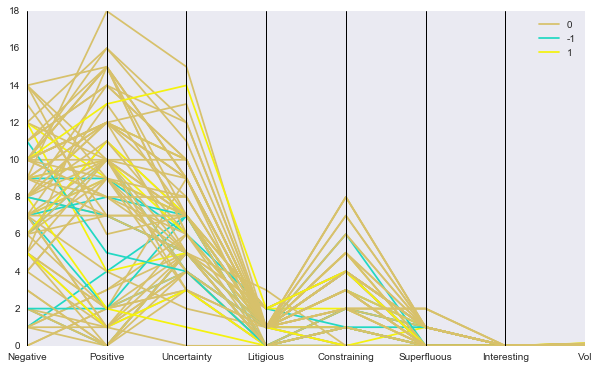

In [86]:
# Assess dispersion among our normalized variables w.r.t. class
plt.figure(figsize=(10,6))
pd.tools.plotting.parallel_coordinates(m_sentiment_cat, 'Return');

Using the 10th/90th percentile splits for outsized positive and negative returns to predict, there is no obvious differentiation between on words counts, with examples of neutral returns (those classified as 0, with returns between the 10th and 90th percentiles) having both greater and fewer counts of positive and negative words. 

In [87]:
# Initialize kNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [88]:
# Use GridSearch to find the optimal parameters for kNN
from sklearn.grid_search import GridSearchCV

parameters = {'n_neighbors': range(1,15), 'weights': ['uniform', 'distance'],
             'p': range(1,3)}

clf = GridSearchCV(knn, parameters)

In [89]:
clf.fit(X_train, y_daily_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [90]:
# Assign kNN parameters as the optimal parameters from GridSearch
best_daily_knn = clf.best_estimator_
print clf.best_params_

{'n_neighbors': 7, 'weights': 'uniform', 'p': 2}


In [91]:
print "kNN prediction score = %.2f%%" % (best_daily_knn.score(X_test, y_daily_test)*100)

kNN prediction score = 92.86%


In [92]:
pd.DataFrame(zip(best_daily_knn.predict(X_test), y_daily_test), columns =('Predict','Actual'))

,Predict,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,1
8,0,0
9,0,0


Prediction appears very good because all of the predictions are zero and most of the actual returns are statistically going to be between the 10th and 90th percentiles.

Assess other measures of performance and then repeat this analysis for the weekly and monthly returns.

In [93]:
print "Observe the percentage of nonzero categorical daily returns is %.2f%%." % (
    float(sum(d_sentiment_cat['Return']!=0))/d_sentiment_cat.shape[0]*100)

Observe the percentage of nonzero categorical daily returns is 21.43%.


Assess precision, recall, and f1 score.

In [94]:
from sklearn.metrics import precision_recall_fscore_support

In [95]:
y_daily_test_pred = best_daily_knn.predict(X_test)
print "Precision = %.1f%%, recall = %.1f%% and f1 score = %.1f%%." % (
        precision_recall_fscore_support(y_daily_test_pred, y_daily_test, average='binary')[0]*100,
        precision_recall_fscore_support(y_daily_test_pred, y_daily_test, average='binary')[1]*100,
        precision_recall_fscore_support(y_daily_test_pred, y_daily_test, average='binary')[2]*100)

Precision = 0.0%, recall = 0.0% and f1 score = 0.0%.


C:\Users\Ben\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1076: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Precision, recall, and f1 score are not useful for assessing prediction if the model always predicts the return will be within the 10th-90th percentile, as the number of true positive predictions (and thus these metrics of performance) will always be zero. 

See if this will also be the case for the weekly and monthly data. If so, expand the range of nonzero categorical returns.

In [96]:
parameters = {'n_neighbors': range(1,15), 'weights': ['uniform', 'distance'],
             'p': range(1,3)}

clf_weekly = GridSearchCV(knn, parameters)

In [97]:
clf_weekly.fit(X_train, y_weekly_train)

# Assign kNN parameters as the optimal parameters from GridSearch
best_weekly_knn = clf_weekly.best_estimator_
print clf_weekly.best_params_

{'n_neighbors': 7, 'weights': 'uniform', 'p': 1}


In [98]:
y_weekly_test_pred = best_weekly_knn.predict(X_test)
print "Precision = %.1f%%, recall = %.1f%% and f1 score = %.1f%%." % (
        precision_recall_fscore_support(y_weekly_test_pred, y_weekly_test, average='binary')[0]*100,
        precision_recall_fscore_support(y_weekly_test_pred, y_weekly_test, average='binary')[1]*100,
        precision_recall_fscore_support(y_weekly_test_pred, y_weekly_test, average='binary')[2]*100)

Precision = 100.0%, recall = 82.1% and f1 score = 90.2%.


C:\Users\Ben\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  app.launch_new_instance()
C:\Users\Ben\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1076: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Ben\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclas

In [99]:
print "kNN prediction score = %.2f%%" % (best_weekly_knn.score(X_test, y_weekly_test)*100)

# Compare predictions to actual returns
pd.DataFrame(zip(best_weekly_knn.predict(X_test), y_weekly_test), columns =('Predict','Actual'))

kNN prediction score = 82.14%


,Predict,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,1
7,0,-1
8,0,0
9,0,0


Again, prediction accuracy exists only as a function of the number of nonzero categorical returns exist in the return time series. However, the nearest neighbors algorithm again makes no nonzero return predictions, likely stemming from the confusing data mentioned above in the sentiment word occurrence by return type chart. 

Deploy model using monthly returns and then seek to change features for better performance.

In [100]:
parameters = {'n_neighbors': range(1,15), 'weights': ['uniform', 'distance'],
             'p': range(1,3)}

clf_monthly = GridSearchCV(knn, parameters)

In [101]:
clf_monthly.fit(X_train, y_monthly_train)

# Assign kNN parameters as the optimal parameters from GridSearch
best_monthly_knn = clf_monthly.best_estimator_
print clf_monthly.best_params_

{'n_neighbors': 5, 'weights': 'uniform', 'p': 2}


In [102]:
y_monthly_test_pred = best_monthly_knn.predict(X_test)
print "Precision = %.1f%%, recall = %.1f%% and f1 score = %.1f%%." % (
        precision_recall_fscore_support(y_monthly_test_pred, y_monthly_test, average='binary')[0]*100,
        precision_recall_fscore_support(y_monthly_test_pred, y_monthly_test, average='binary')[1]*100,
        precision_recall_fscore_support(y_monthly_test_pred, y_monthly_test, average='binary')[2]*100)

Precision = 0.0%, recall = 0.0% and f1 score = 0.0%.


In [103]:
print "kNN prediction score = %.2f%%" % (best_monthly_knn.score(X_test, y_monthly_test)*100)

# Compare predictions to actual returns
pd.DataFrame(zip(best_monthly_knn.predict(X_test), y_monthly_test), columns =('Predict','Actual'))

kNN prediction score = 92.86%


,Predict,Actual
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


The same holds true fitting the nearest neighbors algorithm to the monthly return data. 

I'll now add a sentiment feature and refit the data using nearest neighbors. After this, attempt to fit other models to the data.

In [104]:
X.head()

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Vol
2006-01-31,0,2,5,0,0,0,0,0.000000
2006-03-28,1,4,7,0,0,0,0,0.068267
2006-05-10,1,3,6,0,1,0,0,0.056059
2006-06-29,1,3,5,0,2,0,0,0.080575
2006-08-08,2,1,4,0,2,1,0,0.079068


Definte 'SentScore' as the excess positive word occurrence divided by the sum of positive and negative words. Consider adding 'Uncertainty' words into the denominator as well.

In [109]:
SentScore = []

for i in range(X.shape[0]):
    SentScore.append((X.Positive[i] - X.Negative[i])/(X.Positive[i] + X.Negative[i]))

In [113]:
len(SentScore)

84

In [114]:
X.shape

(84, 8)

Create copy of the X dataset of predictor variables and add sentiment score as a column. 

In [128]:
X2 = X.copy()
X2['Sentiment'] = SentScore

X2.head()

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Vol,Sentiment
2006-01-31,0,2,5,0,0,0,0,0.000000,1.000000
2006-03-28,1,4,7,0,0,0,0,0.068267,0.600000
2006-05-10,1,3,6,0,1,0,0,0.056059,0.500000
2006-06-29,1,3,5,0,2,0,0,0.080575,0.500000
2006-08-08,2,1,4,0,2,1,0,0.079068,-0.333333


Look at correlations of 'Sentiment' to other variables.

In [129]:
X2.corr()

,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Vol,Sentiment
Negative,1.000000,0.640152,0.387257,0.554318,0.536758,0.230630,NaN,0.184350,0.054310
Positive,0.640152,1.000000,0.681622,0.433341,0.676103,0.467169,NaN,-0.129937,0.615905
Uncertainty,0.387257,0.681622,1.000000,0.322485,0.580911,0.390250,NaN,-0.197396,0.424733
Litigious,0.554318,0.433341,0.322485,1.000000,0.409478,0.135674,NaN,0.144357,0.162738
Constraining,0.536758,0.676103,0.580911,0.409478,1.000000,0.386368,NaN,-0.255409,0.317652
Superfluous,0.230630,0.467169,0.390250,0.135674,0.386368,1.000000,NaN,-0.268471,0.146551
Interesting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vol,0.184350,-0.129937,-0.197396,0.144357,-0.255409,-0.268471,NaN,1.000000,-0.180526
Sentiment,0.054310,0.615905,0.424733,0.162738,0.317652,0.146551,NaN,-0.180526,1.000000


Again, separate the new predictor variables into test and train.

In [130]:
# Split independent variable dataset into testing vs training
X2_train, X2_test = X2.iloc[:np.floor(2 * X2.shape[0] / 3).astype(int),:], X2.iloc[np.floor(2 * X2.shape[0] / 3).astype(int):,:]

**Now see if we can achieve meaningful results with kNN with this additional variable.**

See Daily:

In [131]:
parameters = {'n_neighbors': range(1,15), 'weights': ['uniform', 'distance'],
             'p': range(1,3)}

clf2_daily = GridSearchCV(knn, parameters)

In [134]:
clf2_daily.fit(X2_train, y_daily_train)

# Assign kNN parameters as the optimal parameters from GridSearch
best_daily_knn = clf2_daily.best_estimator_
print clf2_daily.best_params_

{'n_neighbors': 9, 'weights': 'uniform', 'p': 1}


In [135]:
y_daily_test_pred = best_daily_knn.predict(X2_test)
print "Precision = %.1f%%, recall = %.1f%% and f1 score = %.1f%%." % (
        precision_recall_fscore_support(y_daily_test_pred, y_daily_test, average='binary')[0]*100,
        precision_recall_fscore_support(y_daily_test_pred, y_daily_test, average='binary')[1]*100,
        precision_recall_fscore_support(y_daily_test_pred, y_daily_test, average='binary')[2]*100)

Precision = 0.0%, recall = 0.0% and f1 score = 0.0%.


In [136]:
print "kNN prediction score = %.2f%%" % (best_daily_knn.score(X2_test, y_daily_test)*100)

# Compare predictions to actual returns
pd.DataFrame(zip(best_daily_knn.predict(X2_test), y_daily_test), columns =('Predict','Actual'))

kNN prediction score = 92.86%


,Predict,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,1
8,0,0
9,0,0


Weekly with sentiment score variable.

In [137]:
parameters = {'n_neighbors': range(1,15), 'weights': ['uniform', 'distance'],
             'p': range(1,3)}

clf2_weekly = GridSearchCV(knn, parameters)

In [138]:
clf2_weekly.fit(X2_train, y_weekly_train)

# Assign kNN parameters as the optimal parameters from GridSearch
best_weekly_knn = clf2_weekly.best_estimator_
print clf2_weekly.best_params_

{'n_neighbors': 7, 'weights': 'uniform', 'p': 1}


In [139]:
y_weekly_test_pred = best_weekly_knn.predict(X2_test)
print "Precision = %.1f%%, recall = %.1f%% and f1 score = %.1f%%." % (
        precision_recall_fscore_support(y_weekly_test_pred, y_weekly_test, average='binary')[0]*100,
        precision_recall_fscore_support(y_weekly_test_pred, y_weekly_test, average='binary')[1]*100,
        precision_recall_fscore_support(y_weekly_test_pred, y_weekly_test, average='binary')[2]*100)

Precision = 100.0%, recall = 82.1% and f1 score = 90.2%.


C:\Users\Ben\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  app.launch_new_instance()
C:\Users\Ben\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
C:

In [141]:
print "kNN prediction score = %.2f%%" % (best_weekly_knn.score(X2_test, y_weekly_test)*100)

# Compare predictions to actual returns
pd.DataFrame(zip(best_weekly_knn.predict(X2_test), y_weekly_test), columns =('Predict','Actual'))

kNN prediction score = 82.14%


,Predict,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,1
7,0,-1
8,0,0
9,0,0


Alas! It appears that kNN may be a poor choice of model for this data. As a last-ditch effort, assess if the performance might improve by testing the nearest neighbors using a binary return classifier instead of having three categories.

By reducing the number of possible outcomes, this *should* make the forecase an easier problem.

In [142]:
# Make copies of the return variables
d_sentiment_bin = d_sentiment.copy()
w_sentiment_bin = w_sentiment.copy()
m_sentiment_bin = m_sentiment.copy()

In [144]:
# Use map function to conditionally change 'Return' variable
d_sentiment_bin['Return'] = map(lambda x: 1 if x > 0 else 0,  d_sentiment.Return)

# Weekly
w_sentiment_bin['Return'] = map(lambda x: 1 if x > 0 else 0,  w_sentiment.Return)

# Monthly
m_sentiment_bin['Return'] = map(lambda x: 1 if x > 0 else 0,  m_sentiment.Return)

In [147]:
# Copy the Return label
y_daily_bin = pd.Categorical(d_sentiment_bin['Return'])
y_weekly_bin = pd.Categorical(w_sentiment_bin['Return'])
y_monthly_bin = pd.Categorical(m_sentiment_bin['Return'])

In [151]:
# Split the three dependent variable sets into test vs train
y_daily_bin_train, y_daily_bin_test = y_daily_bin[:np.floor(2 * X.shape[0] / 3).astype(int)], y_daily_bin[np.floor(2 * X.shape[0] / 3).astype(int):]
y_weekly_bin_train, y_weekly_bin_test = y_weekly_bin[:np.floor(2 * X.shape[0] / 3).astype(int)], y_weekly_bin[np.floor(2 * X.shape[0] / 3).astype(int):]
y_monthly_bin_train, y_monthly_bin_test = y_monthly_bin[:np.floor(2 * X.shape[0] / 3).astype(int)], y_monthly_bin[np.floor(2 * X.shape[0] / 3).astype(int):]

First observe the chart of predictor variables by binary return.

In [248]:
plot_data = pd.DataFrame(zip(w_sentiment_bin[w_sentiment_bin.Return==0].apply(lambda x: np.mean(x), axis=0),
    w_sentiment_bin[w_sentiment_bin.Return==1].apply(lambda x: np.mean(x), axis=0)), 
    columns = ('Negative', 'Positive'), index = sentiments + ['Vol','Return'])

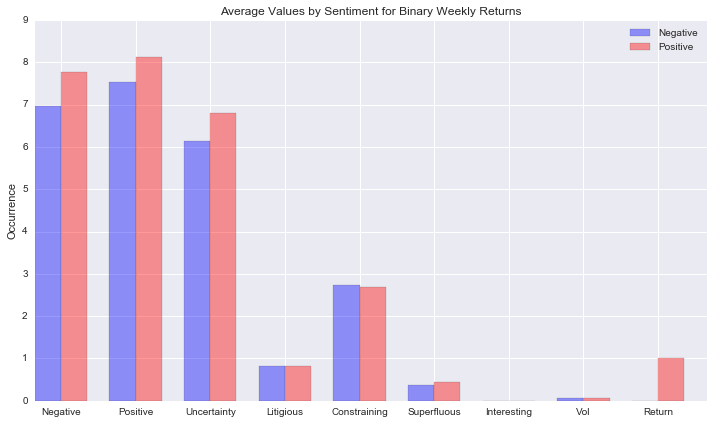

In [233]:
n_groups = 9

neg_vals = plot_data.Negative
pos_vals = plot_data.Positive

fig, ax = plt.subplots(figsize=(10,6))

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, neg_vals, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Negative')

rects3 = plt.bar(index + bar_width, pos_vals, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Positive')

plt.ylabel('Occurrence')
plt.title('Average Values by Sentiment for Binary Weekly Returns')
plt.xticks(index + bar_width, sentiments + ['Vol','Return'])
plt.legend()

plt.tight_layout()
plt.show()

Observe the same chart using monthly returns.

In [230]:
plot_data = pd.DataFrame(zip(m_sentiment_bin[m_sentiment_bin.Return==0].apply(lambda x: np.mean(x), axis=0),
    m_sentiment_bin[m_sentiment_bin.Return==1].apply(lambda x: np.mean(x), axis=0)), 
    columns = ('Negative', 'Positive'), index = sentiments + ['Vol','Return'])

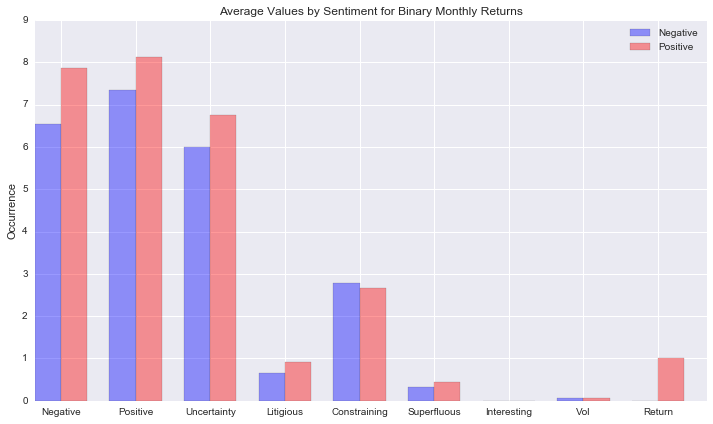

In [231]:
n_groups = 9

neg_vals = plot_data.Negative
pos_vals = plot_data.Positive

fig, ax = plt.subplots(figsize=(10,6))

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, neg_vals, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Negative')

rects3 = plt.bar(index + bar_width, pos_vals, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Positive')

plt.ylabel('Occurrence')
plt.title('Average Values by Sentiment for Binary Monthly Returns')
plt.xticks(index + bar_width, sentiments + ['Vol','Return'])
plt.legend()

plt.tight_layout()
plt.show()

In [254]:
parameters = {'n_neighbors': range(1,15), 'weights': ['uniform', 'distance'],
             'p': range(1,3)}

clf_daily_bin = GridSearchCV(knn, parameters)

In [256]:
clf_daily_bin.fit(X2_train, pd.Series(y_daily_bin_train))

# Assign kNN parameters as the optimal parameters from GridSearch
best_daily_bin_knn = clf_daily_bin.best_estimator_
print clf_daily_bin.best_params_

{'n_neighbors': 11, 'weights': 'uniform', 'p': 2}


In [257]:
y_daily_bin_test_pred = best_daily_bin_knn.predict(X2_test)
print "Precision = %.1f%%, recall = %.1f%% and f1 score = %.1f%%." % (
        precision_recall_fscore_support(y_daily_bin_test_pred, y_daily_bin_test, average='binary')[0]*100,
        precision_recall_fscore_support(y_daily_bin_test_pred, y_daily_bin_test, average='binary')[1]*100,
        precision_recall_fscore_support(y_daily_bin_test_pred, y_daily_bin_test, average='binary')[2]*100)

Precision = 65.0%, recall = 81.2% and f1 score = 72.2%.


In [258]:
print "kNN prediction score = %.2f%%" % (best_daily_bin_knn.score(X2_test, y_daily_bin_test)*100)

# Compare predictions to actual returns
pd.DataFrame(zip(best_daily_bin_knn.predict(X2_test), y_daily_bin_test), columns =('Predict','Actual'))

kNN prediction score = 64.29%


,Predict,Actual
0,1,0
1,1,1
2,1,1
3,0,1
4,0,0
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [264]:
test_df = pd.DataFrame(zip(best_daily_bin_knn.predict(X2_test), y_daily_bin_test), columns =('Predict','Actual'))
print "Number of positive predictions = {}.".format(test_df.Predict.sum())
print "Number of positive outcomes = {}.".format(test_df.Actual.sum())
print "Number of total outcomes = {}.".format(len(test_df))

Number of positive predictions = 16.
Number of positive outcomes = 20.
Number of total outcomes = 28.


While this succeeded in making more nuanced predictions, a dummy regressor predicting all positive returns in this instance would have achieved 20/28 = 71.4% accuracy; better than the realized number. 

**Try to implement a logistic regression on both categorical and binary returns.**

Conduct daily and weekly logistic regressions on the return variables.

Fit the logistic regression to the data. Use default l2 (ridge) penalty.

In [265]:
# Instantiate logistic regression model
from sklearn.linear_model import LogisticRegression

In [266]:
parameters = {'C': np.linspace(1e-5, 1e5, 100), 'class_weight': [None, 'balanced']}
logreg = LogisticRegression()

logmod_cat = GridSearchCV(logreg, parameters)
logmod_cat.fit(X2_train, pd.Series(y_daily_train))

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [268]:
logmod_cat.best_score_

0.7142857142857143

In [269]:
best_log_cat = logmod_cat.best_estimator_
best_log_cat.score(X2_test, y_daily_test)

0.9285714285714286

In [270]:
# calculate classification accuracy
from sklearn import metrics

In [271]:
# class predictions (not predicted probabilities)
y_pred_cat = best_log_cat.predict(X2_test)

print 'Predition accuracy of the logistic regression = %.2f%%.' % (
    metrics.accuracy_score(y_pred_cat, y_daily_test)*100)
print
print "Observe the predicted vs actual return outcomes:"
pd.DataFrame(zip(y_pred_cat, y_daily_test), columns=('Predicted','Actual Categorical'))

Predition accuracy of the logistic regression = 92.86%.

Observe the predicted vs actual categorical return outcomes:


,Predicted,Actual Categorical
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,1
8,0,0
9,0,0


Again, using categorical returns, the logistic regression is unable to differentiate the positive return outcomes. 

Look at the prediction probabilities:

In [299]:
test = pd.DataFrame(best_log_cat.predict_proba(X2_test), columns = ('Neg Predict','Neutral Predict','Pos Predict'))
test['Actual'] = pd.DataFrame(y_daily_test).reset_index().drop('index', axis=1)
test

,Neg Predict,Neutral Predict,Pos Predict,Actual
0,0.329544,0.339424,0.331032,0
1,0.329544,0.339424,0.331032,0
2,0.329253,0.339981,0.330766,0
3,0.329499,0.339655,0.330846,0
4,0.329583,0.339526,0.330891,0
5,0.329706,0.339330,0.330965,0
6,0.329653,0.339352,0.330995,0
7,0.329556,0.339537,0.330906,1
8,0.328571,0.341133,0.330297,0
9,0.328850,0.340740,0.330410,0


There appears to be no connection between higher prediction probabilities. Try again for weekly and then move on to binary classifiers.

In [300]:
parameters = {'C': np.linspace(1e-5, 1e5, 100), 'class_weight': [None, 'balanced']}
logreg = LogisticRegression()

logmod_weekly_cat = GridSearchCV(logreg, parameters)
logmod_weekly_cat.fit(X2_train, pd.Series(y_weekly_train))

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [302]:
logmod_weekly_cat.best_score_

0.7678571428571429

In [303]:
best_log_cat2 = logmod_weekly_cat.best_estimator_
best_log_cat2.score(X2_test, y_weekly_test)

0.8214285714285714

In [304]:
# class predictions (not predicted probabilities)
y_pred_cat2 = best_log_cat2.predict(X2_test)

print 'Predition accuracy of the logistic regression = %.2f%%.' % (
    metrics.accuracy_score(y_pred_cat2, y_weekly_test)*100)
print
print "Observe the predicted vs actual return outcomes:"
pd.DataFrame(zip(y_pred_cat2, y_weekly_test), columns=('Predicted','Actual Categorical'))

Predition accuracy of the logistic regression = 82.14%.

Observe the predicted vs actual return outcomes:


,Predicted,Actual Categorical
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,1
7,0,-1
8,0,0
9,0,0


Again, we observe no ability to determine exceptional return items. Again, observe the probabilities and check if these indicate the model at least coming close to flagging these outcomes.

In [305]:
test = pd.DataFrame(best_log_cat2.predict_proba(X2_test), columns = ('Neg Predict','Neutral Predict','Pos Predict'))
test['Actual'] = pd.DataFrame(y_weekly_test).reset_index().drop('index', axis=1)
test

,Neg Predict,Neutral Predict,Pos Predict,Actual
0,0.329295,0.341263,0.329443,0
1,0.329295,0.341263,0.329443,0
2,0.328974,0.341934,0.329092,0
3,0.329231,0.341489,0.329280,0
4,0.329323,0.341313,0.329364,0
5,0.329455,0.341048,0.329497,0
6,0.329405,0.341131,0.329464,1
7,0.329298,0.341354,0.329347,-1
8,0.328250,0.343419,0.328332,0
9,0.328541,0.342878,0.328581,0


Again, probabilities reveal no indication that the model came close to correctly predicting the top and bottom decile return outcomes.

# Moving on to binary return values

Observe the average predictor variable values for the now-binary return values.

In [163]:
parameters = {'C': np.linspace(1e-5, 1e5, 100), 'class_weight': [None, 'balanced']}
logreg = LogisticRegression()

logmod = GridSearchCV(logreg, parameters)
logmod.fit(X2_train, pd.Series(y_daily_bin_train))

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [165]:
logmod.best_params_

{'C': 1.0000000000000001e-05, 'class_weight': None}

In [169]:
logmod.best_score_

0.5535714285714286

In [178]:
best_log = logmod.best_estimator_
best_log.score(X2_test, y_daily_bin_test)

0.7142857142857143

In [186]:
pd.DataFrame(zip(X2.columns, best_log.coef_[0])).T

,0,1,2,3,4,5,6,7,8
0,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Vol,Sentiment
1,0.000370352,0.000161031,0.000161857,2.94677e-05,8.58755e-06,-1.28333e-07,0,2.19371e-06,-1.4848e-05


In [192]:
# class predictions (not predicted probabilities)
y_pred_class = best_log.predict(X2_test)

print 'Predition accuracy of the logistic regression = %.2f%%.' % (
    metrics.accuracy_score(y_pred_class, y_daily_bin_test)*100)
print
print "Observe the predicted vs actual return outcomes:"
pd.DataFrame(zip(y_pred_class, y_daily_bin_test, y_daily_test), columns=('Predicted','Actual Binary','Actual Categorical'))

Predition accuracy of the logistic regression = 71.43%.

Observe the predicted vs actual return outcomes:


,Predicted,Actual Binary,Actual Categorical
0,1,0,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,0,0
5,1,1,0
6,1,1,0
7,1,1,1
8,1,1,0
9,1,1,0


While this appears to be a huge improvement from the nearest neighbors implementation, this is actually just the opposite problem of the nearest neighbors: before the the predictions of the categorical (-1, 0, 1) was always zero, while the logistic regression always predicts a positive return. Observe below, as precision is 100% - i.e. the model allows for no false negatives - while recall is very low, since there are a large number of false positives.

Observe other measures of performance.

**Add a dummy regressor!**

In [191]:
print "Precision = %.1f%%, recall = %.1f%% and f1 score = %.1f%%." % (
        precision_recall_fscore_support(y_pred_class, y_daily_test, average='binary')[0]*100,
        precision_recall_fscore_support(y_pred_class, y_daily_test, average='binary')[1]*100,
        precision_recall_fscore_support(y_pred_class, y_daily_test, average='binary')[2]*100)

Precision = 100.0%, recall = 7.1% and f1 score = 13.3%.


Conduct the same analysis looking at weekly data.

In [193]:
parameters = {'C': np.linspace(1e-5, 1e5, 100), 'class_weight': [None, 'balanced']}
logreg = LogisticRegression()

logmod_weekly = GridSearchCV(logreg, parameters)
logmod_weekly.fit(X2_train, pd.Series(y_weekly_bin_train))

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [194]:
best_weekly_log = logmod_weekly.best_estimator_
best_weekly_log.score(X2_test, y_weekly_bin_test)

0.4642857142857143

In [195]:
# class predictions (not predicted probabilities)
y_weekly_pred_class = best_weekly_log.predict(X2_test)

print 'Predition accuracy of the logistic regression = %.2f%%.' % (
    metrics.accuracy_score(y_weekly_pred_class, y_weekly_bin_test)*100)
print
print "Observe the predicted vs actual return outcomes for weekly data:"
pd.DataFrame(zip(y_weekly_pred_class, y_weekly_bin_test, y_weekly_test), columns=('Predicted','Actual Binary','Actual Categorical'))

Predition accuracy of the logistic regression = 46.43%.

Observe the predicted vs actual return outcomes for weekly data:


,Predicted,Actual Binary,Actual Categorical
0,0,1,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
5,0,1,0
6,0,1,1
7,0,0,-1
8,0,1,0
9,0,1,0


Check precision, recall, and f1 score.

We see the true number of positive predictions (and thus precision) is zero. 

In [196]:
print "Precision = %.1f%%, recall = %.1f%% and f1 score = %.1f%%." % (
        precision_recall_fscore_support(y_weekly_pred_class, y_weekly_bin_test, average='binary')[0]*100,
        precision_recall_fscore_support(y_weekly_pred_class, y_weekly_bin_test, average='binary')[1]*100,
        precision_recall_fscore_support(y_weekly_pred_class, y_weekly_bin_test, average='binary')[2]*100)

Precision = 0.0%, recall = 0.0% and f1 score = 0.0%.


Again, try the GridSearch logistic regression for monthly data.

In [197]:
parameters = {'C': np.linspace(1e-5, 1e5, 100), 'class_weight': [None, 'balanced']}
logreg = LogisticRegression()

logmod_monthly = GridSearchCV(logreg, parameters)
logmod_monthly.fit(X2_train, pd.Series(y_monthly_bin_train))

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [198]:
best_monthly_log = logmod_monthly.best_estimator_
best_monthly_log.score(X2_test, y_monthly_bin_test)

0.7142857142857143

In [199]:
# class predictions (not predicted probabilities)
y_monthly_pred_class = best_monthly_log.predict(X2_test)

print 'Predition accuracy of the logistic regression = %.2f%%.' % (
    metrics.accuracy_score(y_monthly_pred_class, y_monthly_bin_test)*100)
print
print "Observe the predicted vs actual return outcomes for monthly data:"
pd.DataFrame(zip(y_monthly_pred_class, y_monthly_bin_test, y_monthly_test), columns=('Predicted','Actual Binary','Actual Categorical'))

Predition accuracy of the logistic regression = 71.43%.

Observe the predicted vs actual return outcomes for monthly data:


,Predicted,Actual Binary,Actual Categorical
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,1
4,1,1,0
5,1,1,0
6,1,1,0
7,1,0,0
8,1,0,0
9,1,1,0


Again, models appear to either make all true or false predictions, implying that the choice of predictor/independent variables are a poor choice for predicting the dependent variable at hand.

____________

**Since kNN and logistic regression have achieved limited success**, fit a random forest to the data and observe the feature importance, if any.

In [306]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 20)
rf.fit(X2_train, y_daily_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [307]:
features = X2.columns
feature_importances = rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)
features_df.head()

,Features,Importance Score
0,Negative,0.208001
7,Vol,0.204540
2,Uncertainty,0.175681
1,Positive,0.152737
8,Sentiment,0.094667


In [308]:
rf.score(X2_test, y_daily_test)

0.6428571428571429

In [311]:
test = pd.DataFrame(rf.predict_proba(X2_test), columns = ('Neg Predict','Neutral Predict','Pos Predict'))
test['Prediction'] = rf.predict(X2_test)
test['Actual'] = pd.DataFrame(y_daily_test).reset_index().drop('index', axis=1)

test

,Neg Predict,Neutral Predict,Pos Predict,Prediction,Actual
0,0.05,0.45,0.50,1,0
1,0.05,0.45,0.50,1,0
2,0.05,0.45,0.50,1,0
3,0.05,0.50,0.45,0,0
4,0.00,0.55,0.45,0,0
5,0.00,0.55,0.45,0,0
6,0.05,0.40,0.55,1,0
7,0.05,0.40,0.55,1,1
8,0.25,0.40,0.35,0,0
9,0.10,0.45,0.45,0,0


While the random forest predicts a number of false positives, it also predicts both of the exceptionally large returns correctly. Furthermore, the feature importances are as expected, namely, positive, negative, and uncertain words had the most significance among the text data, while sentiment score (a function of positive and negative words) and trailing one month volatility were also significant. 

See if these results are similarly positive for the weekly data.

In [314]:
rf_weekly = RandomForestClassifier(n_estimators = 20)
rf_weekly.fit(X2_train, y_weekly_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [315]:
features = X2_train.columns
feature_importances = rf_weekly.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)
features_df.head()

,Features,Importance Score
8,Sentiment,0.199236
1,Positive,0.184545
2,Uncertainty,0.178611
7,Vol,0.162329
0,Negative,0.123878


Obseve a positive confirmation that feature importance (though not order) remains consistent over return windows.

In [316]:
rf_weekly.score(X2_test, y_weekly_test)

0.42857142857142855

In [320]:
test = pd.DataFrame(rf_weekly.predict_proba(X2_test), columns = ('Neg Predict','Neutral Predict','Pos Predict'))
test['Prediction'] = rf_weekly.predict(X2_test)
test['Actual'] = pd.DataFrame(y_weekly_test).reset_index().drop('index', axis=1)
test['Return'] = pd.DataFrame(w_sentiment.Return.tail(test.shape[0])).reset_index().drop('index', axis=1)

test

,Neg Predict,Neutral Predict,Pos Predict,Prediction,Actual,Return
0,0.05,0.45,0.50,1,0,0.002507
1,0.05,0.45,0.50,1,0,-0.001563
2,0.05,0.40,0.55,1,0,-0.001320
3,0.05,0.95,0.00,0,0,0.013359
4,0.05,0.95,0.00,0,0,-0.002026
5,0.00,1.00,0.00,0,0,0.006662
6,0.05,0.95,0.00,0,1,0.015374
7,0.05,0.95,0.00,0,-1,-0.012153
8,0.00,0.45,0.55,1,0,0.002869
9,0.05,0.40,0.55,1,0,0.005147


Weekly data was not as positive as the daily data, though feature importance, at least, lends one to be optimistic. Conduct the same fist-order analysis on monthly data and then end with conclusions.

In [321]:
rf_monthly = RandomForestClassifier(n_estimators = 20)
rf_monthly.fit(X2_train, y_monthly_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [323]:
features = X2_train.columns
feature_importances = rf_monthly.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)
features_df.head()

,Features,Importance Score
7,Vol,0.283977
4,Constraining,0.147896
8,Sentiment,0.145055
0,Negative,0.113281
1,Positive,0.105663


In [325]:
rf_monthly.score(X2_test, y_monthly_test)

0.75

In [326]:
test = pd.DataFrame(rf_monthly.predict_proba(X2_test), columns = ('Neg Predict','Neutral Predict','Pos Predict'))
test['Prediction'] = rf_monthly.predict(X2_test)
test['Actual'] = pd.DataFrame(y_monthly_test).reset_index().drop('index', axis=1)
test['Return'] = pd.DataFrame(m_sentiment.Return.tail(test.shape[0])).reset_index().drop('index', axis=1)

test

,Neg Predict,Neutral Predict,Pos Predict,Prediction,Actual,Return
0,0.15,0.55,0.30,0,0,0.006773
1,0.20,0.40,0.40,0,0,0.015528
2,0.40,0.30,0.30,-1,0,0.016701
3,0.30,0.35,0.35,0,1,0.032307
4,0.15,0.75,0.10,0,0,0.000556
5,0.15,0.75,0.10,0,0,0.021822
6,0.25,0.70,0.05,0,0,0.024175
7,0.25,0.70,0.05,0,0,-0.003234
8,0.15,0.80,0.05,0,0,-0.004229
9,0.20,0.70,0.10,0,0,0.009876


The random forest, when fit to the monthly data, fails to correctly predict any of the exceptional return events.

_______________

# Conclusions

After fitting a number of different models under various parameters, I've been unable to consistently form a better prediction than any naive estimator predicting the most common prediction class. This may be for any of a host of reasons such as:

- arbitrary classification of returns into top and bottom decile versus middle
- limited train/test data to FOMC statements with a particular html format
- sentiment as measured by the utilized dictionary simply not being a good predictor of returns; or more specifically, as the dictionary was formed using 10-K's (annual corporate financial statements of individual companies) sentiment scoring using these words is idiosyncratic to equities as opposed to macro moves

While I had little expectation of this method being able to predict returns, I was pleasantly affirmed fitting the random forest and finding, statistically, that the variables assumed to be the most important for prediction were, indeed, so in the context of random forest feature importance.

# Potential Expansion

Given more time and resources, I would like to expand the project by implementing the following:

* Using a diverse array of potential return categorizations
* Standardize the predictor variables by de-meaning to structure word occurrence and volatility/sentiment as "excess" variable exposure
* Expand the dataset by scraping more Fed statements
* Add additional macroeconomic indicators (potentially something in the realm of "now-casting" using Twitter data)
* Conducting vanilla regression using return as a continuous variable

Furthermore, I would like to follow up on one of the original ideas for the project, which was to forecase both returns and volatility. This is to say, using the same sentiment predictors and training returns, can we forecase, with some degree of certainty, the forward market volatility.